In [ ]:
%%capture

#Install dependencies
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install sqlite3
%pip install habanero

# Run Jayvee pipeline
# jv -d ./src/models/14946186/YieldStrengthAndGrainSizeModel.jv (with @jvalue/jayvee-interpreter@0.6.0)

# Data Source Exploration of Materials Science Dataset

## Load prepared data
Create a pandas dataframe using the local sqlite file.

In [6]:
import pandas as pd
import sqlite3

dfs = {}

con = sqlite3.connect("YieldStrengthAndGrainSize.sqlite")
dfs["GrainSize"] = pd.read_sql_query("SELECT * from GrainSize", con)
dfs["YieldStrength"] = pd.read_sql_query("SELECT * from YieldStrength", con)

dfSize = dfs["GrainSize"].copy()
dfStrength = dfs["YieldStrength"].copy()

dfSize["type"] = "GrainSize"
dfStrength["type"] = "YieldStrength"

mergedDf = pd.concat([dfSize, dfStrength], ignore_index=True)

mergedDf

,Compound,Blacklisted Compound?,Value,Units,Parsing Method,DOI,Article Title,Author,Journal,Date,Open Access,type
0,'Cu',false,19.0,(10^-9.0) * Meter^(1.0),Text Parsing,10.1007/s10338-007-0702-4,RATEINDEPENDENTCONSTITUTIVEMODELINGFORPOROUSMU...,JIANQIU,Acta Mechanica Solida Sinica,2009-05-14,false,GrainSize
1,'GB2 = d',false,20.0,(10^-9.0) * Meter^(1.0),Text Parsing,10.1007/s10338-007-0702-4,RATEINDEPENDENTCONSTITUTIVEMODELINGFORPOROUSMU...,JIANQIU,Acta Mechanica Solida Sinica,2009-05-14,false,GrainSize
2,'Quartz',false,0.5,(10^-3.0) * Meter^(1.0),Text Parsing,10.1016/S0008-8846(01)00614-7,RHEOLOGYREBOUNDBEHAVIOURDRYMIXSHOTCRETE,PFEUFFER,Cement and Concrete Research,2001-12-15,false,GrainSize
3,'Cu',false,150.0,(10^-9.0) * Meter^(1.0),Table Parsing,10.1016/S0013-7944(00)00119-3,NANOMECHANICALPROBESNEWAPPROACHESHYDROGENDEFOR...,KATZ,Engineering Fracture Mechanics,2001-03-15,false,GrainSize
4,'Cu',false,130.0,(10^-9.0) * Meter^(1.0),Table Parsing,10.1016/S0013-7944(00)00119-3,NANOMECHANICALPROBESNEWAPPROACHESHYDROGENDEFOR...,KATZ,Engineering Fracture Mechanics,2001-03-15,false,GrainSize
...,...,...,...,...,...,...,...,...,...,...,...,...
69359,'Gd',true,700.2,(10^6.0) * Pascal^(1.0),Text Parsing,10.5516/NET.07.2013.015,FABRICATIONGDCONTAININGDUPLEXSTAINLESSSTEELSHE...,CHOI,Nuclear Engineering and Technology,2015-04-02,false,YieldStrength
69360,"'SA508 GR.4N STEEL', 'SA508 Gr.4N steel'",false,754.0,(10^6.0) * Pascal^(1.0),Text Parsing,10.5516/NET.07.2013.088,EFFECTSTEMPERINGPWHTMICROSTRUCTURESMECHANICALP...,LEE,Nuclear Engineering and Technology,2015-04-02,false,YieldStrength
69361,'STEEL-CONCRETE',false,323.9,(10^6.0) * Pascal^(1.0),Table Parsing,10.5516/NET.09.2011.055,MODELINGNONLINEARCYCLICLOADBEHAVIORISHAPEDCOMP...,ALI,Nuclear Engineering and Technology,2015-04-02,false,YieldStrength
69362,'STEEL-CONCRETE',false,298.2,(10^6.0) * Pascal^(1.0),Table Parsing,10.5516/NET.09.2011.055,MODELINGNONLINEARCYCLICLOADBEHAVIORISHAPEDCOMP...,ALI,Nuclear Engineering and Technology,2015-04-02,false,YieldStrength


## When was the data in the data set published?

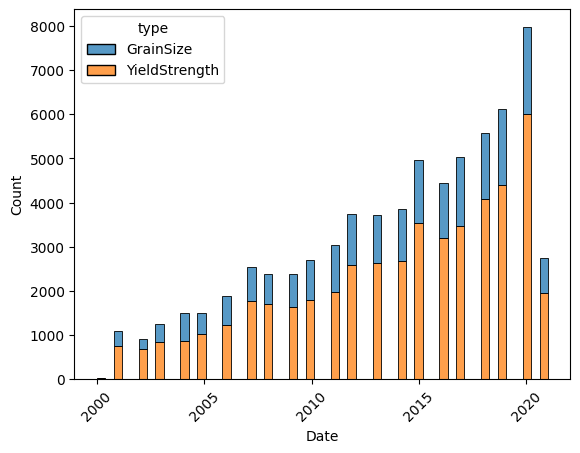

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

mergedDfByMonths = mergedDf.copy()
mergedDfByMonths["Date"] = mergedDfByMonths["Date"].apply(lambda x: int(x[0:4]))

sns.histplot(mergedDfByMonths, x="Date", hue="type", multiple="stack")

plt.xticks(rotation=45)

plt.show()

# What paper are most values from?


In [8]:
import habanero

# Generated by ChatGPT
def get_citation_from_doi(doi):
    """
    Get citation string from a DOI.
    
    Args:
    - doi (str): Digital Object Identifier (DOI) of the paper.
    
    Returns:
    - str: Citation string.
    """
    # Fetch citation data from CrossRef
    cr = habanero.Crossref()
    citation = cr.works(ids=doi)
    
    # Extract citation string
    try:
        title = citation['message']['title'][0]
        authors = ", ".join(author['given'] + " " + author['family'] for author in citation['message']['author'])
        journal = citation['message']['container-title'][0]
        year = citation['message']['created']['date-parts'][0][0]
        
        citation_string = f"{authors}, \"{title}\", {journal}, {year}."
    except KeyError:
        citation_string = "Citation data not found."
    
    return citation_string

In [9]:
from IPython.display import display, Markdown

dfPapers = mergedDf.copy()
dfGrainSize = dfPapers[dfPapers["type"] == "GrainSize"]
dfYieldStrength = dfPapers[dfPapers["type"] == "YieldStrength"]

# Get the top ten papers by occurrence
topPapers = dfPapers['DOI'].value_counts().head(15)

# Print top ten papers in Markdown format
markdown_text = "### Top Papers by Occurrence\n\n"
markdown_text += "| Citation | DOI | Occurrence | Grain Size | Yield Strength |\n"
markdown_text += "|----------|-----|------------|------------|----------------|\n"
for doi, occurrence in topPapers.items():
    citation = get_citation_from_doi(doi)
    fromGrainSize = len(dfGrainSize[dfGrainSize["DOI"] == doi])
    fromYieldStrength = len(dfYieldStrength[dfYieldStrength["DOI"] == doi])
    markdown_text += f"| {citation} | [{doi}](https://doi.org/{doi}) | {occurrence} | {fromGrainSize} | {fromYieldStrength} |\n"

display(Markdown(markdown_text))

### Top Papers by Occurrence

| Citation | DOI | Occurrence | Grain Size | Yield Strength |
|----------|-----|------------|------------|----------------|
| R.T. Qu, Z.Q. Liu, R.F. Wang, Z.F. Zhang, "Yield strength and yield strain of metallic glasses and their correlations with glass transition temperature", Journal of Alloys and Compounds, 2015. | [10.1016/j.jallcom.2015.03.005](https://doi.org/10.1016/j.jallcom.2015.03.005) | 239 | 0 | 239 |
| N.S. Reddy, A.K. Prasada Rao, M. Chakraborty, B.S. Murty, "Prediction of grain size of Al–7Si Alloy by neural networks", Materials Science and Engineering: A, 2004. | [10.1016/j.msea.2004.08.042](https://doi.org/10.1016/j.msea.2004.08.042) | 168 | 168 | 0 |
| Jean-Marc Collin, Gérard Mauvoisin, Philippe Pilvin, Rochdi El Abdi, "Use of spherical indentation data changes to materials characterization based on a new multiple cyclic loading protocol", Materials Science and Engineering: A, 2008. | [10.1016/j.msea.2008.01.041](https://doi.org/10.1016/j.msea.2008.01.041) | 153 | 0 | 153 |
| Qinglong Liu, Qingjun Zhou, Jeffrey Venezuela, Mingxing Zhang, Andrej Atrens, "Evaluation of the influence of hydrogen on some commercial DP, Q&amp;P and TWIP advanced high-strength steels during automobile service", Engineering Failure Analysis, 2018. | [10.1016/j.engfailanal.2018.08.011](https://doi.org/10.1016/j.engfailanal.2018.08.011) | 148 | 0 | 148 |
| Barnasree Chanda, Gaurav Potnis, Parijat P. Jana, Jayanta Das, "A review on nano-/ultrafine advanced eutectic alloys", Journal of Alloys and Compounds, 2020. | [10.1016/j.jallcom.2020.154226](https://doi.org/10.1016/j.jallcom.2020.154226) | 116 | 0 | 116 |
| B.M Gable, A.A Csontos, E.A Starke, "A quench sensitivity study on the novel Al–Li–Cu–X alloy AF/C 458", Journal of Light Metals, 2002. | [10.1016/S1471-5317(02)00024-X](https://doi.org/10.1016/S1471-5317(02)00024-X) | 83 | 0 | 83 |
| Eiichi Wakai, Shigeru Takaya, Yoshinori Matsui, Yuji Nagae, Shoichi Kato, Tomoaki Suzudo, Masataka Yamaguchi, Kazumi Aoto, Shuhei Nogami, Akira Hasegawa, Hiroaki Abe, Koichi Sato, Taku Ishida, Shunsuke Makimura, Patrick G. Hurh, Kavin Ammigan, David J. Senor, Andrew M. Casella, Danny J. Edwards, "Irradiation damages of structural materials under different irradiation environments", Journal of Nuclear Materials, 2020. | [10.1016/j.jnucmat.2020.152503](https://doi.org/10.1016/j.jnucmat.2020.152503) | 83 | 0 | 83 |
| N. Winzer, A. Atrens, W. Dietzel, V.S. Raja, G. Song, K.U. Kainer, "Characterisation of stress corrosion cracking (SCC) of Mg–Al alloys", Materials Science and Engineering: A, 2007. | [10.1016/j.msea.2007.11.064](https://doi.org/10.1016/j.msea.2007.11.064) | 76 | 0 | 76 |
| H.R. Ammar, C. Moreau, A.M. Samuel, F.H. Samuel, H.W. Doty, "Effects of aging parameters on the quality of 413-type commercial alloys", Materials &amp; Design, 2008. | [10.1016/j.matdes.2008.06.065](https://doi.org/10.1016/j.matdes.2008.06.065) | 75 | 0 | 75 |
| Qinglong Liu, Jeffrey Venezuela, Mingxing Zhang, Qingjun Zhou, Andrej Atrens, "Hydrogen trapping in some advanced high strength steels", Corrosion Science, 2016. | [10.1016/j.corsci.2016.05.046](https://doi.org/10.1016/j.corsci.2016.05.046) | 67 | 0 | 67 |
| G.W. Hu, L.C. Zeng, H. Du, X.W. Liu, Y. Wu, P. Gong, Z.T. Fan, Q. Hu, E.P. George, "Tailoring grain growth and solid solution strengthening of single-phase CrCoNi medium-entropy alloys by solute selection", Journal of Materials Science &amp; Technology, 2020. | [10.1016/j.jmst.2020.02.073](https://doi.org/10.1016/j.jmst.2020.02.073) | 67 | 52 | 15 |
| Fusheng Pan, Mingbo Yang, Xianhua Chen, "A Review on Casting Magnesium Alloys: Modification of Commercial Alloys and Development of New Alloys", Journal of Materials Science &amp; Technology, 2016. | [10.1016/j.jmst.2016.07.001](https://doi.org/10.1016/j.jmst.2016.07.001) | 66 | 0 | 66 |
| Hamidreza Farnoush, Davoud Haghshenas Fatmehsari, Jamshid Aghazadeh Mohandesi, Hamid Abdoli, "Evaluation of strengthening behavior of Al–AlN nanostructured composite by the use of modified Heckel model and response surface methodology", Journal of Alloys and Compounds, 2011. | [10.1016/j.jallcom.2011.11.138](https://doi.org/10.1016/j.jallcom.2011.11.138) | 65 | 0 | 65 |
| W.S. Du, R. Cao, Y.J. Yan, Z.L. Tian, Y. Peng, J.H. Chen, "Fracture behavior of 9% nickel high-strength steel at various temperatures", Materials Science and Engineering: A, 2007. | [10.1016/j.msea.2007.09.057](https://doi.org/10.1016/j.msea.2007.09.057) | 63 | 0 | 63 |
| Gang Wang, Yu Yan, Jinxu Li, Jingyu Huang, Yanjing Su, Lijie Qiao, "Hydrogen embrittlement assessment of ultra-high strength steel 30CrMnSiNi2", Corrosion Science, 2013. | [10.1016/j.corsci.2013.08.013](https://doi.org/10.1016/j.corsci.2013.08.013) | 61 | 0 | 61 |
